Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os


# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

Displaying Images

In [3]:
picture_size = 48
train_path="images/train"
test_path="images/test"

Making Training and Validation Data

In [4]:
batch_size  = 150
datagen_train  = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2)
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 validation_split = 0.2)

train_set = datagen_train.flow_from_directory(train_path,
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(test_path,
                                           target_size = (picture_size,picture_size),
                                           color_mode = "grayscale",
                                           batch_size=batch_size,
                                           class_mode='categorical',
                                           shuffle=False)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Model Building

In [5]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate = 0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-30 22:45:01.993439: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-30 22:45:01.993577: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

Fitting the Model with Training and Validation Data

In [6]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint(".model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.01)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 60

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [6]:
history = model.fit_generator(train_set,
                    steps_per_epoch=28709//150,
                    epochs=60,
                    validation_data = test_set,
                    validation_steps = 7178//150,
                    #allbacks=callbacks_list
                                )

Epoch 1/60


/var/folders/ps/sfnw_5nd5jn4ksh73s9swj_00000gn/T/ipykernel_1192/3103062899.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_set,
2022-07-30 14:37:06.871443: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-30 14:37:07.490181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


191/191 [==============================] - ETA: 0s - loss: 1.8996 - accuracy: 0.2441

2022-07-30 14:37:38.278792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


191/191 [==============================] - 33s 161ms/step - loss: 1.8996 - accuracy: 0.2441 - val_loss: 1.8717 - val_accuracy: 0.1760
Epoch 2/60
191/191 [==============================] - 29s 152ms/step - loss: 1.6618 - accuracy: 0.3389 - val_loss: 2.0003 - val_accuracy: 0.2662
Epoch 3/60
191/191 [==============================] - 29s 151ms/step - loss: 1.4952 - accuracy: 0.4173 - val_loss: 1.7500 - val_accuracy: 0.3590
Epoch 4/60
191/191 [==============================] - 29s 151ms/step - loss: 1.3633 - accuracy: 0.4730 - val_loss: 1.4625 - val_accuracy: 0.4270
Epoch 5/60
191/191 [==============================] - 29s 150ms/step - loss: 1.2875 - accuracy: 0.5076 - val_loss: 1.5797 - val_accuracy: 0.3926
Epoch 6/60
191/191 [==============================] - 29s 149ms/step - loss: 1.2302 - accuracy: 0.5314 - val_loss: 1.3777 - val_accuracy: 0.4535
Epoch 7/60
191/191 [==============================] - 29s 153ms/step - loss: 1.1854 - accuracy: 0.5492 - val_loss: 1.2154 - val_accuracy: 0.5

Plotting Accuracy & Loss

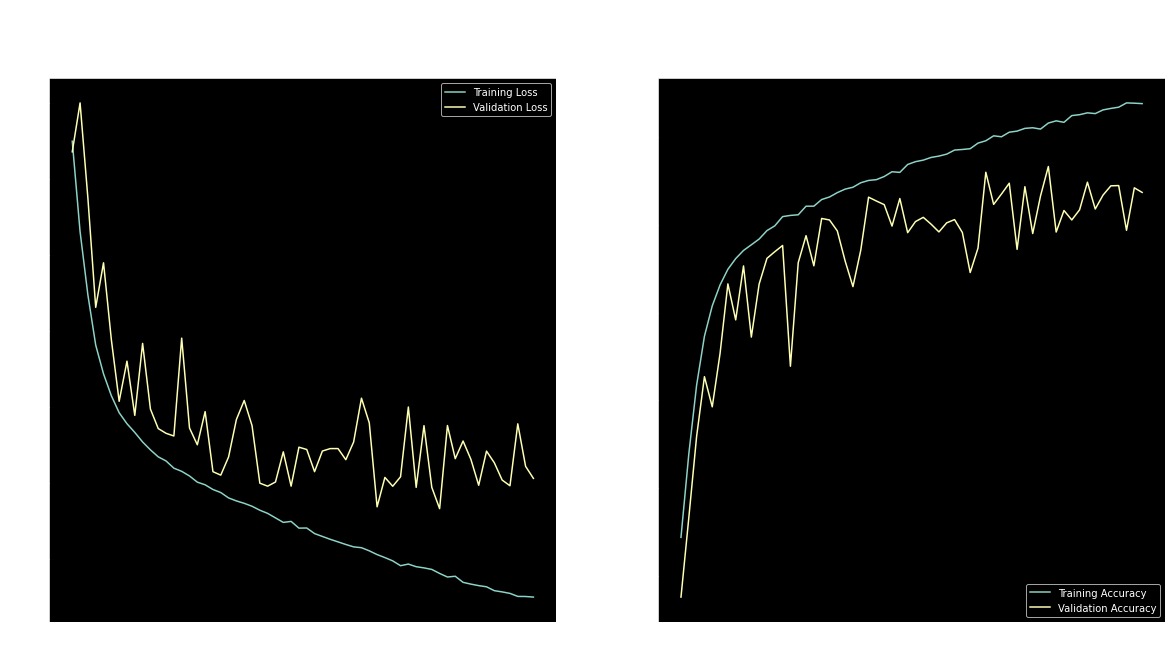

In [7]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()